In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

# Dataset 2
Wer woul

In [3]:
data = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [4]:
data.head()
predict = data.SalePrice
log_predict = np.log(predict)
data.drop('SalePrice', axis = 1, inplace = True)

data.drop(['PID', 'lot_bucket', 'mean_LotFrontage', 'Prop_Addr', 'GarageYrBlt', 'lat', 'long'], axis = 1, inplace = True)

data.drop(['YearRemodAdd', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
           'TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)
data['Total_Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + \
                      data['3SsnPorch'] + data['ScreenPorch']
data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
           axis = 1, inplace = True)

In [5]:
dummy = pd.get_dummies(data, drop_first = True)

# Finding the most important features
Iterate over many random seeds since the train and testR2 vary a lot since our dataset is so small


In [6]:
from collections import defaultdict
num_iters = 10

params = {'alpha' : np.linspace(1e-5,1e-3,10)}
lasso = Lasso(max_iter = 200000)
gs = GridSearchCV(lasso,param_grid=params, verbose = 3, cv = 3, n_jobs = -1)

d = defaultdict(list)
trainR2 = []
testR2 = []
best_params = []

mins = []
maxs =[]

for i in range(num_iters):
    print(i, end = '/r')
    np.random.seed(i)
    
    X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict,test_size = .3)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mins.append(scaler.data_min_)
    maxs.append(scaler.data_max_)
    
    gs.fit(X_train ,y_train)
    best_estimator = gs.best_estimator_
    trainR2.append(best_estimator.score(X_train, y_train))
    testR2.append(best_estimator.score(X_test,y_test))
    best_params.append(gs.best_params_)
    
    
    important_features = pd.Series(best_estimator.coef_, 
                                  index = dummy.columns).sort_values(key = abs,ascending = False)

    
    for i, e in enumerate(important_features.index):
        d[e].append(i)
    
    
 
    
    
    
    

0/rFitting 3 folds for each of 10 candidates, totalling 30 fits
1/rFitting 3 folds for each of 10 candidates, totalling 30 fits
2/rFitting 3 folds for each of 10 candidates, totalling 30 fits
3/rFitting 3 folds for each of 10 candidates, totalling 30 fits
4/rFitting 3 folds for each of 10 candidates, totalling 30 fits
5/rFitting 3 folds for each of 10 candidates, totalling 30 fits
6/rFitting 3 folds for each of 10 candidates, totalling 30 fits
7/rFitting 3 folds for each of 10 candidates, totalling 30 fits
8/rFitting 3 folds for each of 10 candidates, totalling 30 fits
9/rFitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
best_estimator.intercept_

<!-- 10.366 -->
h = range(1,20)


In [9]:
top_f = ['GrLivArea', 'OverallQual', 'OverallCond','YearBuilt','TotalBsmtSF', 'GarageArea','Fireplaces',\
         'BsmtFullBath']

In [12]:

betas = []
for feature in top_f:
    obs = dummy.iloc[244]
    play = obs.copy()
    play.at[feature] = play[feature] + 1
    play = scaler.transform([play])
    obs = scaler.transform([obs])
    beta = np.exp(best_estimator.predict(play))[0]- np.exp(best_estimator.predict(obs))[0]
    betas.append(beta)

    
    
np_betas = np.array(betas)
np_betas

pd.Series(np_betas, index = top_f).to_frame()

,0
GrLivArea,28.428935
OverallQual,6279.141136
OverallCond,4832.893645
YearBuilt,162.076026
TotalBsmtSF,13.155105
GarageArea,12.763801
Fireplaces,1504.683790
BsmtFullBath,4227.779022


In [152]:
k = 10
play = dummy.iloc[[k]][top_f]
print(f'predict : {np.dot(play,np_betas)[0] }')
print(f'actual  : {predict[k]}')

predict : 435402.1826662835
actual  : 140000


predict

In [128]:
predict

0       126000
1       139500
2       139500
3       124900
4       114000
         ...  
2619    121000
2620    139600
2621    145000
2622    217500
2623    215000
Name: SalePrice, Length: 2624, dtype: int64

array([0.00026092])

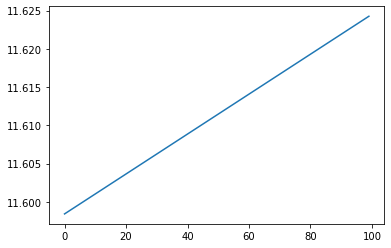

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,99,100),v)
v[10]-v[9]

2.0

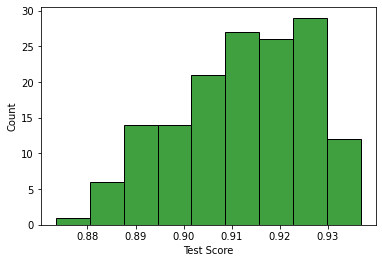

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.histplot(trainR2,color = 'orange')
fig.set(xlabel = 'Train Score', ylabel = 'Count')
plt.savefig('TRAINR2HIST.png')
plt.clf()
fig = sns.histplot(testR2,color = 'green')
fig.set(xlabel = 'Test Score', ylabel = 'Count')
plt.savefig('TESTR2HIST.png')

In [13]:
pd.Series(scaler.data_min_,index = dummy.columns)


GrLivArea                 334.0
MSSubClass                 20.0
LotFrontage                21.0
LotArea                  1300.0
OverallQual                 1.0
                          ...  
SaleCondition_AdjLand       0.0
SaleCondition_Alloca        0.0
SaleCondition_Family        0.0
SaleCondition_Normal        0.0
SaleCondition_Partial       0.0
Length: 239, dtype: float64

In [27]:
pd.set_option('display.max_rows',None)
b = important_features.to_frame()
b[b != 0].count()

0    79
dtype: int64

In [58]:
lasso = Lasso(max_iter = 2000000)
params = {'alpha' : np.linspace(1e-5,1e-3,100)}

X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict,test_size = .3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = dummy.columns)
X_test = pd.DataFrame(X_test, columns = dummy.columns)
X_train[top]

gs = GridSearchCV(lasso, param_grid=params, cv = 5)
gs.fit(X_train[top],y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000000),
             param_grid={'alpha': array([1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05, 7.0e-05,
       8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04, 1.4e-04,
       1.5e-04, 1.6e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04, 2.1e-04,
       2.2e-04, 2.3e-04, 2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04, 2.8e-04,
       2.9e-04, 3.0e-04, 3.1e-04, 3.2e-04, 3.3e-04, 3.4e-04...
       5.7e-04, 5.8e-04, 5.9e-04, 6.0e-04, 6.1e-04, 6.2e-04, 6.3e-04,
       6.4e-04, 6.5e-04, 6.6e-04, 6.7e-04, 6.8e-04, 6.9e-04, 7.0e-04,
       7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04, 7.7e-04,
       7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04, 8.4e-04,
       8.5e-04, 8.6e-04, 8.7e-04, 8.8e-04, 8.9e-04, 9.0e-04, 9.1e-04,
       9.2e-04, 9.3e-04, 9.4e-04, 9.5e-04, 9.6e-04, 9.7e-04, 9.8e-04,
       9.9e-04, 1.0e-03])})

In [59]:
be = gs.best_estimator_

In [60]:
be.score(X_train[top],y_train)

0.8792413937182599

In [61]:
be.score(X_test[top],y_test)

0.9028574165626394

In [62]:
trainR2 = []
testR2 = []
for i in range(40):
    
    X_train, X_test, y_train, y_test = train_test_split(dummy[top],log_predict)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    trainR2.append(be.score(X_train, y_train))
    testR2.append(be.score(X_test, y_test))
    

In [63]:
print(np.mean(trainR2))
print(np.mean(testR2))
list(zip(trainR2,testR2))

0.8757585793888838
0.875873239875083


[(0.8830093927018674, 0.8410759828091984),
 (0.8868053222667769, 0.8787312000115757),
 (0.8898420707984505, 0.8474462469392179),
 (0.8732847960792642, 0.9022290963747266),
 (0.8749998014267265, 0.8946116425475401),
 (0.8795191502471345, 0.8974991131126686),
 (0.8792702996559089, 0.8972264616508725),
 (0.8691341597220291, 0.8909012330892548),
 (0.8775967709905363, 0.8922046821210611),
 (0.8665544840032664, 0.9048382299121203),
 (0.8805612640977071, 0.9037895762792709),
 (0.8837635648120431, 0.8855536838386562),
 (0.8810000857589032, 0.8937284199570414),
 (0.8689731677123347, 0.8842282707798247),
 (0.8879261140111187, 0.8770481007356002),
 (0.8746376615963046, 0.8609533815415322),
 (0.8826549069320133, 0.8887120402840063),
 (0.8732905345024646, 0.8379983275085454),
 (0.8753093273093904, 0.9122445054504918),
 (0.8776325750278999, 0.8640855319723835),
 (0.8795161506934013, 0.8535616726648025),
 (0.8838038881166654, 0.8936650261558194),
 (0.8867325830188533, 0.8338511321690306),
 (0.8726273

In [40]:
data.groupby('Neighborhood')['SalePrice'].agg([np.mean, np.min, np.max])

KeyError: 'Column not found: SalePrice'

In [41]:
data2 = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [72]:
data2.groupby('Neighborhood')['SalePrice'].agg([np.mean, np.min, np.max, np.std]).sort_values(by = 'mean')

,mean,amin,amax,std
Neighborhood,,,,
MeadowV,96682.631579,73000,151400,19904.135885
BrDale,106491.666667,83000,125500,12046.562561
IDOTRR,107840.300000,34900,212300,35139.906583
BrkSide,126116.105769,39300,223500,35780.568253
OldTown,126886.686636,12789,475000,45180.207699
Edwards,132972.609467,35000,415000,47964.462570
SWISU,133575.809524,60000,197000,29980.848960
Landmrk,137000.000000,137000,137000,NaN
Sawyer,137446.865248,62383,219000,22780.631455


In [98]:
import matplotlib.pyplot as plt
for f in list(d.keys())[:20]:
    sns.histplot(d[f])
    plt.savefig(f'dum2/{f}.pdf')
    plt.clf()
    
    

<Figure size 432x288 with 0 Axes>

In [100]:
newD = {k:sum(v)/num_iters for k, v in d.items()}

In [103]:
sort = dict(sorted(newD.items(), key=lambda item: item[1]))

In [108]:
for f in list(sort.keys())[:20]:
    sns.histplot(d[f])
    plt.savefig(f'dum2/{f}')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [107]:
list(sort.keys())[:20]

['GrLivArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'SaleCondition_Partial',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'BsmtFullBath',
 'BldgType_Twnhs',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'SaleCondition_Normal',
 'MSZoning_C (all)',
 'KitchenQual_Fa',
 'CentralAir_Y',
 'KitchenQual_TA',
 'Total_Porch',
 'BldgType_Duplex']

In [124]:
important_features = pd.Series(best_estimator.coef_, 
                                  index = dummy.columns).sort_values(key = abs,ascending = False)
dummy[important_features.index[:2]]

,GrLivArea,OverallQual
0,856,6
1,1049,5
2,1049,5
3,1001,5
4,1039,4
...,...,...
2619,952,6
2620,1733,3
2621,2002,5
2622,1842,7


In [144]:
from collections import defaultdict
num_iters = 50

params = {'alpha' : np.linspace(1e-5,1e-3,100)}
lasso = Lasso()
d = defaultdict(list)
avg_trainR2 = []
avg_testR2 = []
best_params = []
gs = GridSearchCV(lasso,param_grid=params, verbose = 3, cv = 3, n_jobs = -1)

for i in range(1,21): #number of features to be added to model
    for j in range(40): # number of iterations to average together
        trainR2 = []
        testR2 = []
        print(f'{i}  {j} ', end = '/r')
        np.random.seed(i + j)
        
        X_train, X_test, y_train, y_test = train_test_split(dummy[important_features.index[:i]], log_predict)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        gs.fit(X_train, y_train)
        best_estimator = gs.best_estimator_
        trainR2.append(best_estimator.score(X_train, y_train))
        testR2.append(best_estimator.score(X_test, y_test))
        
    avg_trainR2.append(round(np.mean(trainR2),3))
    avg_testR2.append(round(np.mean(testR2),3))
        
        

1  0 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  1 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  2 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  3 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  4 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  5 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  6 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  7 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  8 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  9 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  10 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  11 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  12 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  13 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
1  14 /rFitting 

3  36 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
3  37 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
3  38 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
3  39 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  0 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  1 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  2 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  3 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  4 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  5 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  6 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  7 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  8 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  9 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
4  10 /rFitting 

6  32 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  33 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  34 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  35 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  36 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  37 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  38 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
6  39 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  0 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  1 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  2 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  3 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  4 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  5 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
7  6 /rFitti

9  28 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  29 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  30 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  31 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  32 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  33 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  34 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  35 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  36 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  37 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  38 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
9  39 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
10  0 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
10  1 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
10  2 

12  23 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  24 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  25 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  26 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  27 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  28 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  29 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  30 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  31 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  32 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  33 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  34 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  35 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
12  36 /rFitting 3 folds for each of 100 candidates, totalling 3

15  18 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  19 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  20 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  21 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  22 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  23 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  24 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  25 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  26 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  27 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  28 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  29 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  30 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
15  31 /rFitting 3 folds for each of 100 candidates, totalling 3

18  13 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  14 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  15 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  16 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  17 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  18 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  19 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  20 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  21 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  22 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  23 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  24 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  25 /rFitting 3 folds for each of 100 candidates, totalling 300 fits
18  26 /rFitting 3 folds for each of 100 candidates, totalling 3

In [145]:
print(avg_trainR2)
print(avg_testR2)

[0.529, 0.766, 0.809, 0.813, 0.87, 0.875, 0.876, 0.88, 0.885, 0.886, 0.89, 0.904, 0.901, 0.904, 0.91, 0.901, 0.899, 0.91, 0.901, 0.897]
[0.486, 0.771, 0.805, 0.816, 0.843, 0.86, 0.881, 0.892, 0.887, 0.88, 0.891, 0.859, 0.889, 0.882, 0.871, 0.898, 0.902, 0.872, 0.906, 0.923]


In [132]:
import geopy
from geopy.distance import geodesic
from geopy import Point

def distance(row, other_location):
    neighborhoodLocation = Point(row['lat'],row['long'])
    return round(geodesic(neighborhoodLocation,other_location).miles,2)

In [133]:
dummy.apply(lambda r : distance(r,Point(42.026789, -93.646802)),axis = 1)

KeyError: 'lat'

# Categorizing the Neighborhoods into 1 (deemed important by LR) and 0 (not)
and dropping the neighbor column, see how that goes

In [27]:
data = pd.read_csv('./../data/ames_v5_local.csv')


heavy_neighborhoods = ['Neighborhood_Crawfor','Neighborhood_Somerst','Neighborhood_MeadowV','Neighborhood_StoneBr']
data['NeighborhoodGroup'] = data.apply(lambda r : 1 if r['Neighborhood'] in heavy_neighborhoods else 0,axis = 1)


log_price = np.log(data['SalePrice'])
data.drop(['logGrLivArea','SalePrice','TonyFeature','SalePrice','Neighborhood'], inplace = True,axis = 1)

dummy2 = pd.get_dummies(data, drop_first=True)



In [28]:
lasso = Lasso(max_iter = 2e6)
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(dummy2,log_price)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gs = GridSearchCV(lasso,param_grid={'alpha' : np.linspace(1e-5,1e-3,200)}, cv = 4, verbose = 3, n_jobs = -1)
gs.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


GridSearchCV(cv=4, estimator=Lasso(max_iter=2000000.0), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.49748744e-05, 1.99497487e-05, 2.49246231e-05,
       2.98994975e-05, 3.48743719e-05, 3.98492462e-05, 4.48241206e-05,
       4.97989950e-05, 5.47738693e-05, 5.97487437e-05, 6.47236181e-05,
       6.96984925e-05, 7.46733668e-05, 7.96482412e-05, 8.46231156e-05,
       8.95979899e-05, 9.45...
       8.85577889e-04, 8.90552764e-04, 8.95527638e-04, 9.00502513e-04,
       9.05477387e-04, 9.10452261e-04, 9.15427136e-04, 9.20402010e-04,
       9.25376884e-04, 9.30351759e-04, 9.35326633e-04, 9.40301508e-04,
       9.45276382e-04, 9.50251256e-04, 9.55226131e-04, 9.60201005e-04,
       9.65175879e-04, 9.70150754e-04, 9.75125628e-04, 9.80100503e-04,
       9.85075377e-04, 9.90050251e-04, 9.95025126e-04, 1.00000000e-03])},
             verbose=3)

In [29]:
be = gs.best_estimator_

In [30]:
be.score(X_train, y_train)

0.9287179813992581

In [31]:
be.score(X_test, y_test)

0.8819798112664546

In [32]:
pd.Series(be.coef_,index = dummy2.columns).sort_values(key = abs, ascending = False).to_frame().T

,GrLivArea,OverallQual,TotalBsmtSF,OverallCond,LotArea,YearBuilt,MSZoning_FV,BsmtFinSF1,MSZoning_RL,GarageArea,MSZoning_RH,GarageCars,MSZoning_RM,Exterior1st_BrkFace,TotalPorchSF,BldgType_Twnhs,Foundation_Stone,BedroomAbvGr,ExterQual_Fa,CentralAir_Y,MasVnrArea,KitchenQual_TA,2ndFlrSF,BldgType_Duplex,KitchenQual_Fa,CombinedBathroom,LowQualFinSF,YearRemodAdd,BsmtFinSF2,KitchenQual_Gd,HouseStyle_2.5Unf,GarageCond_Fa,TotRmsAbvGrd,BsmtExposure_None,MSSubClass,BsmtQual_TA,GarageType_Attchd,BsmtExposure_Gd,BsmtQual_Gd,HeatingQC_TA,Foundation_PConc,BsmtExposure_No,BsmtFinType1_LwQ,GarageCond_TA,ExterCond_TA,Fireplaces,HeatingQC_Fa,FireplaceQu_None,ExterQual_Gd,FireplaceQu_Gd,BsmtExposure_Mn,GarageType_Detchd,ExterQual_TA,Exterior1st_VinylSd,LotShape_IR3,HouseStyle_2Story,PavedDrive_Y,BsmtCond_Gd,Exterior1st_Stucco,BsmtQual_Fa,YrSold,MasVnrType_Stone,LotShape_Reg,BsmtFinType1_Rec,BsmtFinType1_Unf,Exterior1st_MetalSd,GarageType_BuiltIn,Exterior1st_Wd Sdng,HouseStyle_SFoyer,BsmtFinType1_GLQ,WoodDeckSF,LotShape_IR2,Electrical_SBrkr,HeatingQC_Gd,HouseStyle_SLvl,Exterior1st_WdShing,MoSold,long,HouseStyle_1Story,BldgType_TwnhsE,MasVnrType_None,GarageFinish_RFn,GarageFinish_Unf,ExterCond_Fa,lat,Exterior1st_HdBoard,PavedDrive_P,GarageQual_TA,GarageQual_Po,GarageCond_None,LotFrontage,FireplaceQu_Po,FireplaceQu_TA,GarageCond_Po,1stFlrSF,GarageType_Basment,GarageType_CarPort,Exterior1st_CemntBd,GarageQual_None,Exterior1st_CBlock,GarageType_None,GarageFinish_None,GarageCond_Gd,BsmtUnfSF,GarageQual_Fa,GarageQual_Gd,ExterCond_Po,Electrical_FuseF,FireplaceQu_Fa,BldgType_2fmCon,Foundation_CBlock,HouseStyle_2.5Fin,Foundation_Slab,Foundation_Wood,HouseStyle_1.5Unf,BsmtQual_None,BsmtCond_Fa,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,MasVnrType_BrkFace,Exterior1st_ImStucc,BsmtFinType1_BLQ,Exterior1st_AsphShn,BsmtFinType1_None,Exterior1st_PreCast,Exterior1st_Plywood,MSZoning_I (all),HeatingQC_Po,NeighborhoodGroup,ExterCond_Gd,Electrical_FuseP,Exterior1st_BrkComm
0,1.01747,0.512441,0.375953,0.357772,0.248539,0.237929,0.194033,0.16182,0.152116,0.123479,0.112525,0.103626,0.085999,0.074626,0.074339,-0.071893,0.070365,-0.067417,-0.065772,0.063734,0.062071,-0.059778,0.058809,-0.052268,-0.050454,0.049595,-0.044855,0.044647,0.042937,-0.041854,0.041575,-0.035272,0.03303,-0.032772,-0.032678,-0.030944,0.030704,0.029563,-0.029424,-0.028257,0.02819,-0.027287,-0.02708,0.026247,0.025271,0.024356,-0.023236,-0.022586,-0.022147,0.021954,-0.020631,0.020582,-0.020508,0.019105,-0.018851,-0.01779,0.017704,0.015596,0.015431,-0.015388,-0.015185,0.014642,-0.013597,-0.013462,-0.013315,0.01321,0.013169,0.013047,0.012914,0.012333,0.011539,0.010941,0.010663,-0.010657,0.010295,-0.009933,-0.009049,0.007599,-0.007313,-0.006759,0.0067,-0.006242,-0.006007,-0.005807,0.003923,0.003246,-0.002027,-0.001171,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0


In [33]:
data[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond','YearBuilt', 'GarageArea','SalePrice']]

,GrLivArea,OverallQual,TotalBsmtSF,OverallCond,YearBuilt,GarageArea,SalePrice
0,856,6,856.0,6,1939,399.0,126000
1,1049,5,1049.0,5,1984,266.0,139500
2,1049,5,1049.0,5,1984,266.0,139500
3,1001,5,837.0,9,1930,216.0,124900
4,1039,4,405.0,8,1900,281.0,114000
...,...,...,...,...,...,...,...
2619,952,6,952.0,6,1916,192.0,121000
2620,1733,3,0.0,5,1955,452.0,139600
2621,2002,5,1001.0,6,1949,871.0,145000
2622,1842,7,985.0,5,2000,486.0,217500


In [30]:
log_predict

0       11.744037
1       11.845820
2       11.845820
3       11.735269
4       11.643954
          ...    
2619    11.703546
2620    11.846536
2621    11.884489
2622    12.289954
2623    12.278393
Name: SalePrice, Length: 2624, dtype: float64

In [131]:
import yellowbrick
from yellowbrick.regressor import CooksDistance

/Users/charlesphillips/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


CooksDistance(ax=<AxesSubplot:>)

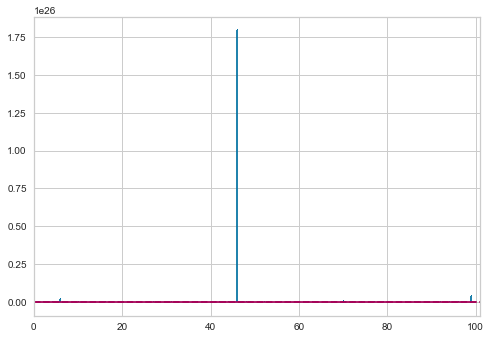

In [146]:
visualizer = CooksDistance()
visualizer.fit(dummy.loc[:100,:], log_predict[:101])

In [140]:
dummy.loc[:20,:]

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,Total_Porch,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,30,64.9,7890,6,6,1939,0.0,856.0,1.0,0.0,1,0,2,1,1,399.0,0,0,0,3,2010,166,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,